In [11]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv('data/housing.csv')

In [15]:
pd.get_dummies(df, drop_first=True)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [16]:
y = df['MEDV']

In [17]:
X = df[df.columns[df.columns != 'MEDV']]

In [18]:
X_scale = scale(X)
# = pd.DataFrame(X_scale, columns=X.columns)

In [19]:
X_scale.shape, y.shape

((489, 3), (489,))

In [20]:
acc_score = []
plot= []
for p in np.linspace(1, 10, 200):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    acc_score.append((p, cross_val_score(knn, X_scale, y, cv=kf, scoring='neg_mean_squared_error').mean()))
    plot.append(cross_val_score(knn, X_scale, y, cv=kf, scoring='neg_mean_squared_error').mean())

In [21]:
sorted(acc_score, key=lambda acc_score: acc_score[1])[0]

(np.float64(8.010050251256281), np.float64(-5067301021.656343))

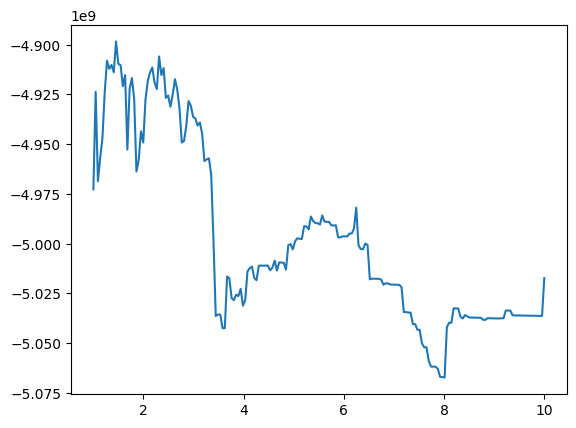

In [22]:
plt.plot(np.linspace(1, 10, 200), plot)